In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv(r"C:\Users\Akusu\Data-Collisions.csv")

C:\Users\Akusu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [60]:
df1.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [59]:
df1 = df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']].copy()
df1 = df1.dropna(subset=['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND'])


In [7]:
df1.SEVERITYCODE.value_counts()

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

In [63]:
print(df1.WEATHER.value_counts())
print(df1.ROADCOND.value_counts())
print(df1.LIGHTCOND.value_counts())

Clear                       111008
Raining                      33117
Overcast                     27681
Unknown                      15039
Snowing                        901
Other                          824
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
Dry               124300
Wet                47417
Unknown            15031
Ice                 1206
Snow/Slush           999
Other                131
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64
Daylight                    116077
Dark - Street Lights On      48440
Unknown                      13456
Dusk                          5889
Dawn                          2502
Dark - No Street Lights       1535
Dark - Street Lights Off      1192
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, d

In [9]:
X = df1[['WEATHER','ROADCOND','LIGHTCOND']].values
X[0:5]

array([['Overcast', 'Wet', 'Daylight'],
       ['Overcast', 'Wet', 'Daylight'],
       ['Clear', 'Dry', 'Dark - Street Lights On'],
       ['Raining', 'Wet', 'Dark - Street Lights On'],
       ['Overcast', 'Wet', 'Daylight']], dtype=object)

In [10]:
from sklearn import preprocessing

numW = preprocessing.LabelEncoder()
weatherdata = pd.DataFrame({'index':[0,1,2,3,4,5,6,7,8,9,10],
'wList':['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy']})
weatherdata['weather_values_encoded'] = numW.fit_transform(weatherdata['wList'].values)
weatherdata = weatherdata.drop_duplicates('wList').set_index('index')
X[:,0] = numW.transform(X[:,0]) 


numR = preprocessing.LabelEncoder()
roaddata = pd.DataFrame({'index':[0,1,2,3,4,5,6,7,8],
'rList':['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil']})
roaddata['road_values_encoded'] = numR.fit_transform(roaddata['rList'].values)
roaddata = roaddata.drop_duplicates('rList').set_index('index')
X[:,1] = numR.transform(X[:,1])


numL = preprocessing.LabelEncoder()
lightdata = pd.DataFrame({'index':[0,1,2,3,4,5,6,7,8],
'LList':[ 'Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting']})
lightdata['light_values_encoded'] = numL.fit_transform(lightdata['LList'].values)
lightdata = lightdata.drop_duplicates('LList').set_index('index')
X[:,2] = numL.transform(X[:,2]) 

X[0:5]

array([[4, 8, 5],
       [4, 8, 5],
       [1, 0, 2],
       [6, 8, 2],
       [4, 8, 5]], dtype=object)

In [11]:
print(weatherdata)

                          wList  weather_values_encoded
index                                                  
0                         Clear                       1
1                       Raining                       6
2                      Overcast                       4
3                       Unknown                      10
4                       Snowing                       9
5                         Other                       3
6                Fog/Smog/Smoke                       2
7      Sleet/Hail/Freezing Rain                       8
8             Blowing Sand/Dirt                       0
9              Severe Crosswind                       7
10                Partly Cloudy                       5


In [12]:
print(roaddata)

                rList  road_values_encoded
index                                     
0                 Dry                    0
1                 Wet                    8
2             Unknown                    7
3                 Ice                    1
4          Snow/Slush                    5
5               Other                    3
6      Standing Water                    6
7       Sand/Mud/Dirt                    4
8                 Oil                    2


In [13]:
print(lightdata)

                          LList  light_values_encoded
index                                                
0                      Daylight                     5
1       Dark - Street Lights On                     2
2                       Unknown                     8
3                          Dusk                     6
4                          Dawn                     4
5       Dark - No Street Lights                     0
6      Dark - Street Lights Off                     1
7                         Other                     7
8       Dark - Unknown Lighting                     3


In [14]:
y = df1['SEVERITYCODE']
y[0:5]

0         2
61910     2
61872     2
147419    2
61869     2
Name: SEVERITYCODE, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
#us = NearMiss(version=3, n_neighbors=7)
#X_trainset, y_trainset = us.fit_sample(X_trainset, y_trainset)
#sm = SMOTE(sampling_strategy='auto', random_state=3)
#X_trainset, y_trainset = sm.fit_sample(X_trainset, y_trainset)
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.30, random_state=3)

In [16]:
X_trainset.shape, y_trainset.shape

((132535, 3), (132535,))

In [17]:
unique_elements, counts_elements = np.unique(y_trainset,return_counts=True)
print(np.asarray((unique_elements,counts_elements)))

[[    1     2]
 [92680 39855]]


In [54]:
RFC = RandomForestClassifier(criterion="entropy", max_depth=6)
RFC.fit(X_trainset,y_trainset)

RandomForestClassifier(criterion='entropy', max_depth=6)

In [40]:
predTree = RFC.predict(X_testset)
print (predTree [0:10])
print (y_testset [0:10])

[1 1 1 1 1 1 1 1 1 1]
133702    2
162204    1
192907    2
183117    1
148113    2
177935    1
131445    2
168130    2
131102    1
81542     1
Name: SEVERITYCODE, dtype: int64


In [57]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_testset, predTree))
print("Random Forest's F1 Score: ", metrics.f1_score(y_testset, predTree))

Random Forest's Accuracy:  0.6972465758247949
Random Forest's F1 Score:  0.8216208366612383


In [22]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#from StringIO import StringIO
from IPython.display import Image
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

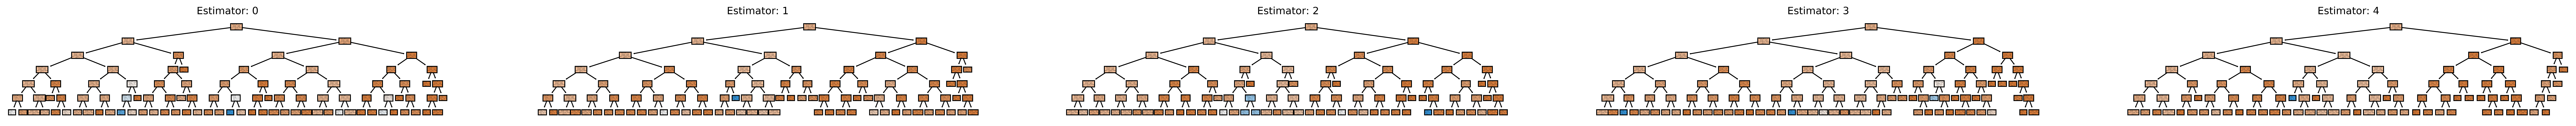

In [61]:
featureNames = df1.columns[1:4]
targetNames = df1["SEVERITYCODE"].unique().tolist()
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (50,2), dpi=600)
for index in range(0, 5):
    tree.plot_tree(RFC.estimators_[index],
                   feature_names=featureNames, 
                   class_names=np.unique(y_trainset.astype(str)),
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')